In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import regex as re
%matplotlib inline

In [2]:
# Load clubs data
clubs_info_df = pd.read_json("../../parsing/parsedData/complete_clubs.json")
clubs_info_df.head(15)

,TeamID,Year,TeamCost,AverageAge,Legioners,TeamSize,PlayerIDS,NationalPlayersCount,TeamSizeRatio
0,1002,2014,"4,25 млн €","21,5",16,39,"[95621, 112797, 169963, 198986, 38793, 139304,...",11,NaN
1,1002,2015,"3,60 млн €","21,6",12,32,"[112797, 169963, 198986, 38793, 133770, 133613...",9,0.82
2,1002,2016,"3,48 млн €","21,0",10,38,"[112797, 169963, 198986, 324448, 133770, 13361...",15,1.19
3,1002,2017,"3,55 млн €","21,3",8,37,"[112797, 169963, 198986, 324448, 363402, 13361...",10,0.97
4,1002,2018,"5,80 млн €","22,4",9,39,"[198981, 112797, 169963, 198986, 324448, 36359...",13,1.05
5,1002,2019,"4,68 млн €","21,4",5,38,"[198981, 324448, 169963, 363402, 549282, 73962...",14,0.97
6,1002,2020,"5,15 млн €","21,0",3,40,"[198981, 324448, 242044, 363402, 739626, 24736...",16,1.05
7,1002,2021,"5,75 млн €","22,4",3,37,"[198981, 324448, 242044, 363402, 402119, 57422...",17,0.93
8,1002,2022,"5,06 млн €","22,3",3,38,"[242044, 324448, 363402, 402119, 198988, 24736...",14,1.03
9,1002,2023,"5,33 млн €","21,2",5,51,"[363402, 402119, 324448, 488270, 927920, 24736...",15,1.34


In [3]:
# Show dimensionality
clubs_info_df.shape

(5896, 9)

In [4]:
# Check axes
clubs_info_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID ', 'Year', 'TeamCost', 'AverageAge', 'Legioners', 'TeamSize',
        'PlayerIDS', 'NationalPlayersCount', 'TeamSizeRatio'],
       dtype='object')]

In [5]:
# Remove extra symbols from column names
clubs_info_df.columns = clubs_info_df.columns.str.strip()

In [6]:
# See changes
clubs_info_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID', 'Year', 'TeamCost', 'AverageAge', 'Legioners', 'TeamSize',
        'PlayerIDS', 'NationalPlayersCount', 'TeamSizeRatio'],
       dtype='object')]

In [7]:
# Drop redundant columns, such as "AverageAge", "Legioners", "TeamSize", "PlayerIDS", "NationalPlayersCount", "TeamSizeRatio": we will not need them
clubs_info_df.drop(columns=["AverageAge", "Legioners", "TeamSize", "PlayerIDS", "NationalPlayersCount", "TeamSizeRatio"], inplace=True)
clubs_info_df.head(10)

,TeamID,Year,TeamCost
0,1002,2014,"4,25 млн €"
1,1002,2015,"3,60 млн €"
2,1002,2016,"3,48 млн €"
3,1002,2017,"3,55 млн €"
4,1002,2018,"5,80 млн €"
5,1002,2019,"4,68 млн €"
6,1002,2020,"5,15 млн €"
7,1002,2021,"5,75 млн €"
8,1002,2022,"5,06 млн €"
9,1002,2023,"5,33 млн €"


In [8]:
# Check for missing values (NaNs)
clubs_info_df.isna().sum()

TeamID      0
Year        0
TeamCost    0
dtype: int64

In [9]:
# Group by "TeamID" and see how many entries (years) we have
clubs_info_df.groupby(by="TeamID", as_index=False) \
    .agg({"TeamCost": "count"}) \
    .sort_values(by="TeamCost")

,TeamID,TeamCost
0,3,11
365,9211,11
364,9095,11
363,9026,11
362,8969,11
...,...,...
171,967,11
170,964,11
169,941,11
183,1044,11


Okay, it seems that we do not have missing values, try one more check:

In [10]:
# Select rows from the previous cell that have amount of "TeamCost" not equal to 11
clubs_info_df.groupby(by="TeamID", as_index=False) \
    .agg({"TeamCost": "count"}) \
    .sort_values(by="TeamCost") \
    .query("TeamCost != 11")

,TeamID,TeamCost


In [11]:
# Now let us have a look on what we have in TeamCost column
clubs_info_df.TeamCost.unique()

array(['4,25 млн €', '3,60 млн €', '3,48 млн €', ..., '119,28 млн €',
       '125,90 млн €', '102,05 млн €'], dtype=object)

In [12]:
# We saw only "млн" pattern, let us try a different approach
clubs_info_df[~clubs_info_df["TeamCost"].str.contains("млн")]

,TeamID,Year,TeamCost
30,1004,2022,125 тыс €
31,1004,2023,-
32,1004,2024,-
33,1007,2014,-
34,1007,2015,-
...,...,...,...
5878,98841,2018,-
5879,98841,2019,-
5880,98841,2020,-
5881,98841,2021,175 тыс €


In [13]:
# Check how many "-" we have
clubs_info_df.query("TeamCost == '-'")

,TeamID,Year,TeamCost
31,1004,2023,-
32,1004,2024,-
33,1007,2014,-
34,1007,2015,-
35,1007,2016,-
...,...,...,...
5876,98841,2016,-
5877,98841,2017,-
5878,98841,2018,-
5879,98841,2019,-


In [14]:
# And the number of rows is:
clubs_info_df.query("TeamCost == '-'").shape[0]

263

In [15]:
# Check how many rows with digits we have
clubs_info_df[clubs_info_df["TeamCost"].str.contains(r"\d")]

,TeamID,Year,TeamCost
0,1002,2014,"4,25 млн €"
1,1002,2015,"3,60 млн €"
2,1002,2016,"3,48 млн €"
3,1002,2017,"3,55 млн €"
4,1002,2018,"5,80 млн €"
...,...,...,...
5891,995,2020,"94,75 млн €"
5892,995,2021,"112,65 млн €"
5893,995,2022,"119,28 млн €"
5894,995,2023,"125,90 млн €"


In [16]:
# And the number of rows is
clubs_info_df[clubs_info_df["TeamCost"].str.contains(r"\d")].shape[0]

5633

Great, in total we have exactly 5896 rows, and it means, that we have found whole diversity of this column. Now we will process "TeamCost" column

In [17]:
# Okay, we saw that also there may be "-" symbols and "тыс" ones, let us remove missing values and make values comparable
# Find teams with missing years and store them for further removal from the Data Frame
teams_to_remove = clubs_info_df.query("TeamCost == '-'")["TeamID"].unique()

In [18]:
# Remove teams
clubs_info_df.drop(clubs_info_df[clubs_info_df["TeamID"].isin(teams_to_remove)].index, inplace=True)
clubs_info_df.query("TeamCost == '-'")

,TeamID,Year,TeamCost


In [ ]:
# Remove commas from string in "TeamCost" column, remove "тыс" (thousand), replace "млн" (million) with one zero because numbers that represent millions have exactly 2 float digits, and replace "Млрд." (billion) with 4 zeros, so that every number will represent amount of thousands in cost
clubs_info_df.TeamCost = clubs_info_df.TeamCost. \
    str.replace(",", "") \
    .str.replace("тыс", "") \
    .str.replace("млн", "0") \
    .str.replace("Млрд.", "0000") \
    .str.replace("€", "") \
    .str.replace(" ", "")
clubs_info_df.head(15)

,TeamID,Year,TeamCost
0,1002,2014,4250
1,1002,2015,3600
2,1002,2016,3480
3,1002,2017,3550
4,1002,2018,5800
5,1002,2019,4680
6,1002,2020,5150
7,1002,2021,5750
8,1002,2022,5060
9,1002,2023,5330


In [20]:
# Check data types
clubs_info_df.dtypes

TeamID       int64
Year         int64
TeamCost    object
dtype: object

In [21]:
# Convert TeamCost to int, so that it will be comparable well
clubs_info_df.TeamCost = clubs_info_df.TeamCost.astype(int)
clubs_info_df.dtypes

TeamID      int64
Year        int64
TeamCost    int64
dtype: object

In [22]:
clubs_info_df.sort_values(by=["TeamCost"], ascending=False).head(20)

,TeamID,Year,TeamCost
2462,281,2023,1460000
3727,418,2023,1380000
2463,281,2024,1300000
3728,418,2024,1230000
504,11,2023,1200000
2457,281,2018,1200000
4899,631,2018,1170000
2732,31,2018,1170000
1038,131,2018,1160000
2461,281,2022,1150000


In [23]:
# Convert "TeamID" to category for better representation
clubs_info_df.TeamID = clubs_info_df.TeamID.astype("object")
clubs_info_df.dtypes

TeamID      object
Year         int64
TeamCost     int64
dtype: object

In [24]:
# Find teams with biggest average "TeamCost" over the period
clubs_info_df.groupby("TeamID", as_index=False) \
    .agg({"TeamCost": "mean"}) \
    .sort_values(by=["TeamCost"], ascending=False) \
    .head(5)

,TeamID,TeamCost
69,281,975827.272727
99,418,923790.909091
36,131,871589.090909
129,631,845790.909091
13,31,797890.909091


**Hypothesis: Spain and England clubs are more expensive in average compared to other countries**

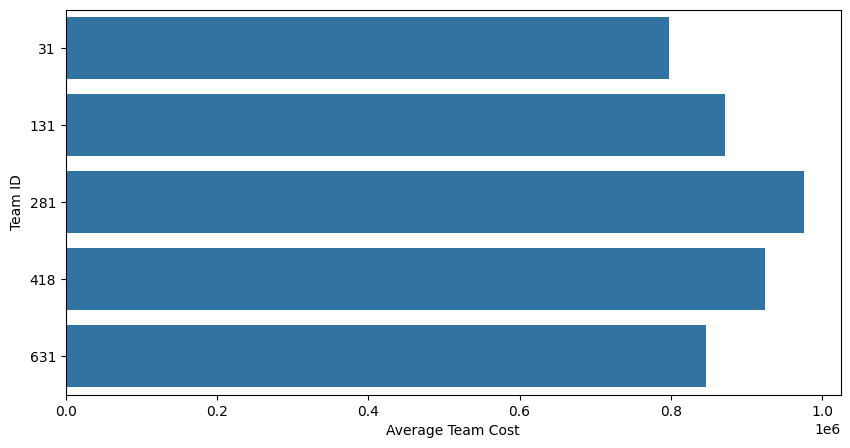

In [25]:
# Let us make some visualizations
plt.figure(figsize=(10, 5))
sns.barplot(
            data=clubs_info_df.groupby("TeamID", as_index=False) \
                    .agg({"TeamCost": "mean"}) \
                    .sort_values(by=["TeamCost"], ascending=False) \
                    .head(5),
            x="TeamCost",
            y="TeamID",
            orient="h",
            errorbar=None)
plt.xlabel("Average Team Cost")
plt.ylabel("Team ID")
None

**We obtained the following results, where TeamIDs correspond to Team Names as follows: 31 - Liverpool (England), 131 - Barcelona (Spain), 281 - Manchester City (England), 418 - Real Madrid (Spain), 631 - FC Chelsea (England)**

In [26]:
# Sort by "TeamCost" and "TeamID" and see the result
clubs_info_df.sort_values(by=["TeamID", "TeamCost"])
clubs_info_df.head(15)

,TeamID,Year,TeamCost
0,1002,2014,4250
1,1002,2015,3600
2,1002,2016,3480
3,1002,2017,3550
4,1002,2018,5800
5,1002,2019,4680
6,1002,2020,5150
7,1002,2021,5750
8,1002,2022,5060
9,1002,2023,5330


In [27]:
# Write results to a file
with open("total_team_cost.json", "w") as file:
    json.dump(clubs_info_df.to_dict(orient="records"), file, indent=4)